In [1]:
import os
import cv2
import face_recognition as fr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Face_recognition3():

    # 감마 보정 공식
        # 감마가 1보다 작으면 밝은 부분이 잘보인다.
        # 감마가 1보다 크면 어두운 부분이 잘보인다.
    def gamma_correction(image, gamma=1.0):
        inv_gamma = 1 / gamma
        output = np.uint8(((image / 255) ** inv_gamma) * 255)
        return output


    def verification2(self, img1_path, img2_path, case_num):
        img1 = cv2.imread(img1_path)
        img2 = cv2.imread(img2_path)
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        encode_img1 = fr.face_encodings(img1)[0]
        encode_img2 = fr.face_encodings(img2)[0]
        res = fr.compare_faces([encode_img1], encode_img2)
        dist = fr.face_distance([encode_img1], encode_img2)
        print(f'#Case{case_num} 기본 모델 : {res}', f'거리 : {dist}')

        img_face1 = fr.face_locations(img1)
        img_face2 = fr.face_locations(img2)
        img1_crop = img1[img_face1[0][0]:img_face1[0][2], img_face1[0][3]:img_face1[0][1]] 
        img2_crop = img2[img_face2[0][0]:img_face2[0][2], img_face2[0][3]:img_face2[0][1]] 
        encode_img1 = fr.face_encodings(img1_crop)[0]
        encode_img2 = fr.face_encodings(img2_crop)[0]
        res = fr.compare_faces([encode_img1], encode_img2)
        dist = fr.face_distance([encode_img1], encode_img2)
        print(f'#Case{case_num} 크롭 추가 : {res}', f'거리 : {dist}')
        
        img1 = Face_recognition3.gamma_correction(img1, gamma=1.1)
        encode_img1 = fr.face_encodings(img1_crop)[0]
        encode_img2 = fr.face_encodings(img2_crop)[0]
        res = fr.compare_faces([encode_img1], encode_img2)
        dist = fr.face_distance([encode_img1], encode_img2)
        print(f'#Case{case_num} 감마 추가 : {res}', f'거리 : {dist}')

        img_face1 = fr.face_locations(img1)
        img1_crop = img1[img_face1[0][0]:img_face1[0][2], img_face1[0][3]:img_face1[0][1]] 
        img2_crop = img2[img_face2[0][0]:img_face2[0][2], img_face2[0][3]:img_face2[0][1]] 
        encode_img1 = fr.face_encodings(img1_crop)[0]
        encode_img2 = fr.face_encodings(img2_crop)[0]
        res = fr.compare_faces([encode_img1], encode_img2)
        dist = fr.face_distance([encode_img1], encode_img2)
        print(f'#Case{case_num} 둘다 추가 : {res}', f'거리 : {dist}')
        print('')

    
    def verification(self, img1_path, img2_path, case_num):
        img1 = cv2.imread(img1_path)
        img2 = cv2.imread(img2_path)
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        try:
            encode_img1 = fr.face_encodings(img1)[0]
            encode_img2 = fr.face_encodings(img2)[0]
            res = fr.compare_faces([encode_img1], encode_img2)
            dist = fr.face_distance([encode_img1], encode_img2)
            print(f'#Case{case_num} 기본 모델 : {res}', f'거리 : {dist}')
        except:
            print(f'#Case{case_num} 얼굴 검출에 실패하였습니다.')

### [test1]기본 모델과 크롭 or 감마보정 전처리 후 모델 비교 실험
- 성능이 개선되는 경우도 있었으나 대체로 기본 모델이 더 작은 거리차이를 보고했다.(기본이 더 낫다.)
- 얼굴이 크롭 될 때 범위를 어떻게 설정하느냐에 따라 성능의 차이를 보이는 것으로 생각된다.(크롭, 감마 전처리는 안하는게 나을 수 있다.)

In [71]:
FaceRecog = Face_recognition3()
dataset = 'C:/Users/SY/Desktop/AI code/IDcard_OCR/data/dataset'

for i in range(1,11):
    data_path = f'{dataset}/{i}'
    os.chdir(f'{dataset}/{i}')
    file_list=os.listdir()
    face_path = f'{data_path}/{file_list[1]}'
    card_path = f'{data_path}/{file_list[2]}'
    FaceRecog.verification2(face_path, card_path, i)

#Case1 기본 모델 : [True] 거리 : [0.48702549]
#Case1 크롭 추가 : [True] 거리 : [0.50405618]
#Case1 감마 추가 : [True] 거리 : [0.50405618]
#Case1 둘다 추가 : [True] 거리 : [0.50324022]

#Case2 기본 모델 : [True] 거리 : [0.38066126]
#Case2 크롭 추가 : [True] 거리 : [0.39599208]
#Case2 감마 추가 : [True] 거리 : [0.39599208]
#Case2 둘다 추가 : [True] 거리 : [0.40036124]

#Case3 기본 모델 : [False] 거리 : [0.60834117]
#Case3 크롭 추가 : [False] 거리 : [0.61761144]
#Case3 감마 추가 : [False] 거리 : [0.61761144]
#Case3 둘다 추가 : [False] 거리 : [0.61566405]

#Case4 기본 모델 : [True] 거리 : [0.39471344]
#Case4 크롭 추가 : [True] 거리 : [0.40975353]
#Case4 감마 추가 : [True] 거리 : [0.40975353]
#Case4 둘다 추가 : [True] 거리 : [0.41079922]

#Case5 기본 모델 : [True] 거리 : [0.53824238]
#Case5 크롭 추가 : [True] 거리 : [0.54730816]
#Case5 감마 추가 : [True] 거리 : [0.54730816]
#Case5 둘다 추가 : [True] 거리 : [0.57151098]

#Case6 기본 모델 : [True] 거리 : [0.44393438]
#Case6 크롭 추가 : [True] 거리 : [0.47135331]
#Case6 감마 추가 : [True] 거리 : [0.47135331]
#Case6 둘다 추가 : [True] 거리 : [0.46936225]

#Case7 기본 모델 : [True] 거리 : [0.

### [test2]악세사리 착용 유무가 다른 경우
dataset[3, 15, 16, 20, 22, 31, 32, 35, 54, 56, 69, 73, 75, 77, 83, 88, 90, 91, 92, 95, 96, 97, 98, 99]  
(case 35) : 모자써서 눈 부분이 잘 안잡혀서 그런듯?  
(case 95) : 신분증 사진이 훼손되어 있어서 False 나온 것으로 추정  
(case 83) : 사진이 많이 어둡고 눈을 감고 있어서 False 나온 것으로 추정  
(case 03) : 안경 차이가 큰 것으로 추정  

- 결과 : 악세사리를 유무가 다른 경우라 하더라도 대체로 잘 맞췄다.

In [21]:
FaceRecog = Face_recognition3()
dataset = 'C:/Users/SY/Desktop/AI code/IDcard_OCR/data/dataset'
sample = [3, 15, 16, 20, 22, 31, 32, 35, 54, 56, 69, 73, 75, 77, 83, 88, 90, 91, 92, 95, 96, 97, 98, 99]

for i in sample:
    data_path = f'{dataset}/{i}'
    os.chdir(f'{dataset}/{i}')
    file_list=os.listdir()
    face_path = f'{data_path}/{file_list[1]}'
    card_path = f'{data_path}/{file_list[2]}'
    FaceRecog.verification(face_path, card_path, i)

#Case3 기본 모델 : [False] 거리 : [0.60834117]
#Case15 기본 모델 : [True] 거리 : [0.35774845]
#Case16 기본 모델 : [True] 거리 : [0.46036953]
#Case20 기본 모델 : [True] 거리 : [0.57274732]
#Case22 기본 모델 : [True] 거리 : [0.53055399]
#Case31 기본 모델 : [True] 거리 : [0.49282131]
#Case32 기본 모델 : [True] 거리 : [0.45216818]
#Case54 기본 모델 : [True] 거리 : [0.43808289]
#Case56 기본 모델 : [True] 거리 : [0.49556966]
#Case69 기본 모델 : [True] 거리 : [0.37168585]
#Case73 기본 모델 : [True] 거리 : [0.51232939]
#Case75 기본 모델 : [True] 거리 : [0.52786967]
#Case77 기본 모델 : [True] 거리 : [0.58160514]
#Case83 기본 모델 : [False] 거리 : [0.66265977]
#Case88 기본 모델 : [True] 거리 : [0.37707728]
#Case90 기본 모델 : [True] 거리 : [0.46911011]
#Case91 기본 모델 : [True] 거리 : [0.45118947]
#Case92 기본 모델 : [True] 거리 : [0.4426016]
#Case95 기본 모델 : [False] 거리 : [0.63229615]
#Case96 기본 모델 : [True] 거리 : [0.42368308]
#Case97 기본 모델 : [True] 거리 : [0.36356138]
#Case98 기본 모델 : [True] 거리 : [0.32073629]
#Case99 기본 모델 : [True] 거리 : [0.54753022]


#### CASE 3
- 어둡고 안경쓴 사진이 False를 보고했다.
- 얼굴 사진의 밝기를 올리고 신분증의 밝기를 내린 결과 아슬아슬하게 True를 보고하였다.

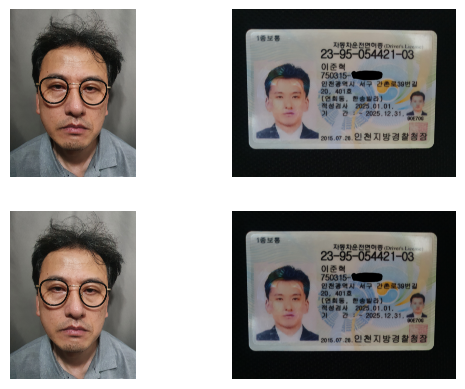

#Case3 기본 모델 : [True] 거리 : [0.59620567]


In [56]:
case = 3

data_path = f'{dataset}/{case}'
os.chdir(f'{dataset}/{case}')
file_list=os.listdir()
face_path = f'{data_path}/{file_list[1]}'
card_path = f'{data_path}/{file_list[2]}'

img1 = cv2.imread(face_path)
img2 = cv2.imread(card_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(2,2,1)
plt.imshow(img1)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img2)
plt.axis('off')

# 감마 보정
img1 = Face_recognition3.gamma_correction(img1, gamma=1.1)
img2 = Face_recognition3.gamma_correction(img2, gamma=0.85)

plt.subplot(2,2,3)
plt.imshow(img1)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img2)
plt.axis('off')

plt.show()

encode_img1 = fr.face_encodings(img1)[0]
encode_img2 = fr.face_encodings(img2)[0]
res = fr.compare_faces([encode_img1], encode_img2)
dist = fr.face_distance([encode_img1], encode_img2)

print(f'#Case{case} 기본 모델 : {res}', f'거리 : {dist}')

#### CASE 35
- 모자때문에 눈 부분이 어두워서 얼굴 검출이 되지 않았다.
- 감마 보정을 하니 얼굴이 검출되었고 True를 보고 하였다.

In [38]:
case = 35

data_path = f'{dataset}/{case}'
os.chdir(f'{dataset}/{case}')
file_list=os.listdir()
face_path = f'{data_path}/{file_list[1]}'
card_path = f'{data_path}/{file_list[2]}'

img1 = cv2.imread(face_path)
img2 = cv2.imread(card_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
try:
    encode_img1 = fr.face_encodings(img1)[0]
    encode_img2 = fr.face_encodings(img2)[0]
    res = fr.compare_faces([encode_img1], encode_img2)
    dist = fr.face_distance([encode_img1], encode_img2)
    print(f'#Case{case} 기본 모델 : {res}', f'거리 : {dist}')
except:
    print(f'#Case{case} 얼굴검출에 실패하였습니다.')



#Case35 얼굴검출에 실패하였습니다.


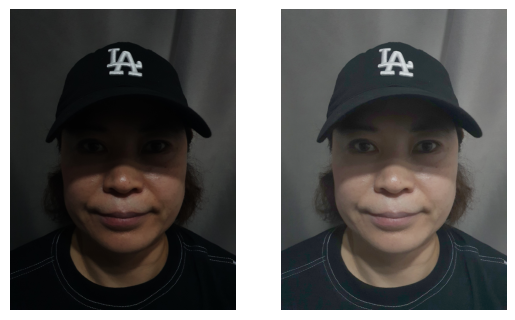

#Case35 기본 모델 : [True] 거리 : [0.57877829]


In [30]:
case = 35

data_path = f'{dataset}/{case}'
os.chdir(f'{dataset}/{case}')
file_list=os.listdir()
face_path = f'{data_path}/{file_list[1]}'
card_path = f'{data_path}/{file_list[2]}'

img1 = cv2.imread(face_path)
img2 = cv2.imread(card_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis('off')

# 감마 보정
img1 = Face_recognition3.gamma_correction(img1, gamma=2)

plt.subplot(1,2,2)
plt.imshow(img1)
plt.axis('off')
plt.show()

encode_img1 = fr.face_encodings(img1)[0]
encode_img2 = fr.face_encodings(img2)[0]
res = fr.compare_faces([encode_img1], encode_img2)
dist = fr.face_distance([encode_img1], encode_img2)

print(f'#Case{case} 기본 모델 : {res}', f'거리 : {dist}')

#### CASE 83
- 어둡고 눈을 감은 사진이 False 보고했다.
- 감마 보정을 한 결과 거리는 조금 더 가까워졌지만 여전히 False를 보고했다.
- 밝은 눈 뜬 정면 사진 결과 감마 보정한 것보다 조금 더 가까워졌지만 여전히 False를 보고했다.
- 신분증 사진이 너무 밝아서 코부분이 잘 드러나지 않는 것 때문이라고 추정

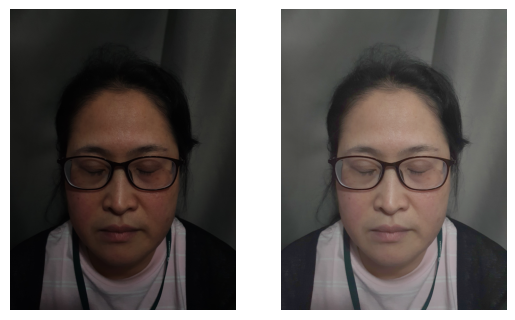

#Case83 기본 모델 : [False] 거리 : [0.63010986]


In [39]:
case = 83

data_path = f'{dataset}/{case}'
os.chdir(f'{dataset}/{case}')
file_list=os.listdir()
face_path = f'{data_path}/{file_list[1]}'
card_path = f'{data_path}/{file_list[2]}'

img1 = cv2.imread(face_path)
img2 = cv2.imread(card_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis('off')

# 감마 보정
img1 = Face_recognition3.gamma_correction(img1, gamma=2)

plt.subplot(1,2,2)
plt.imshow(img1)
plt.axis('off')
plt.show()

encode_img1 = fr.face_encodings(img1)[0]
encode_img2 = fr.face_encodings(img2)[0]
res = fr.compare_faces([encode_img1], encode_img2)
dist = fr.face_distance([encode_img1], encode_img2)

print(f'#Case{case} 기본 모델 : {res}', f'거리 : {dist}')

In [40]:
case = 83

data_path = f'{dataset}/{case}'
os.chdir(f'{dataset}/{case}')
file_list=os.listdir()
face_path = f'{data_path}/{file_list[0]}'
card_path = f'{data_path}/{file_list[2]}'

img1 = cv2.imread(face_path)
img2 = cv2.imread(card_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

encode_img1 = fr.face_encodings(img1)[0]
encode_img2 = fr.face_encodings(img2)[0]
res = fr.compare_faces([encode_img1], encode_img2)
dist = fr.face_distance([encode_img1], encode_img2)

print(f'#Case{case} 기본 모델 : {res}', f'거리 : {dist}')

#Case83 기본 모델 : [False] 거리 : [0.62679689]


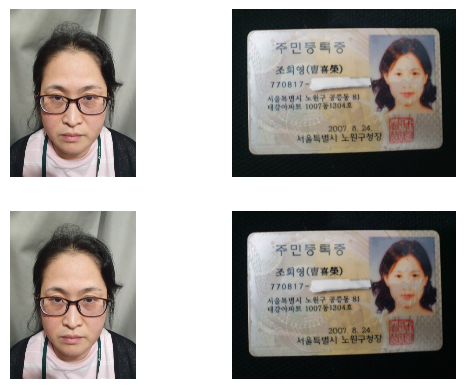

#Case83 기본 모델 : [False] 거리 : [0.62440692]


In [53]:
case = 83

data_path = f'{dataset}/{case}'
os.chdir(f'{dataset}/{case}')
file_list=os.listdir()
face_path = f'{data_path}/{file_list[0]}'
card_path = f'{data_path}/{file_list[2]}'

img1 = cv2.imread(face_path)
img2 = cv2.imread(card_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(2,2,1)
plt.imshow(img1)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img2)
plt.axis('off')

# 감마 보정
img1 = Face_recognition3.gamma_correction(img1, gamma=1)
img2 = Face_recognition3.gamma_correction(img2, gamma=0.85)

plt.subplot(2,2,3)
plt.imshow(img1)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img2)
plt.axis('off')

plt.show()

encode_img1 = fr.face_encodings(img1)[0]
encode_img2 = fr.face_encodings(img2)[0]
res = fr.compare_faces([encode_img1], encode_img2)
dist = fr.face_distance([encode_img1], encode_img2)

print(f'#Case{case} 기본 모델 : {res}', f'거리 : {dist}')

## 기본 모델 성능 테스트
- 재현율은 95%로 높았다.
- 그러나 위 양성 보고가 많은 것으로 보아 threshold 값이 높은 것으로 생각 된다.  
(쉽게 양성을 줘서 정밀도가 떨어지는 모델이다.)

#### Actual True 데이터 테스트 (95/100)

In [ ]:
FaceRecog = Face_recognition3()
dataset = 'C:/Users/SY/Desktop/AI code/IDcard_OCR/data/dataset'

for i in range(1,101):
    data_path = f'{dataset}/{i}'
    os.chdir(f'{dataset}/{i}')
    file_list=os.listdir()
    face_path = f'{data_path}/{file_list[1]}'
    card_path = f'{data_path}/{file_list[2]}'
    FaceRecog.verification(face_path, card_path, i)

In [60]:
# 62번 데이터의 경우 신분증 색이 바래서 너무 밝고 하얗게 나왔고 얼굴 사진의 경우 조명이 어두웠다.
# 83번 데이터의 경우 신분증 사진이 너무 밝아 코부분이 명확하게 보이지 않고 얼굴 사진이 어두웠다.
# 95번 데이터의 경우 신분증 사진이 훼손 되어 있고 얼수 사진 부분이 어두웠다.

#### Actual False 데이터 테스트(47/100)

In [4]:
from random import seed
from random import randint

FaceRecog = Face_recognition3()
dataset = 'C:/Users/SY/Desktop/AI code/IDcard_OCR/data/dataset'
seed(1)

for k in range(1,101):
    while True:
        i = randint(1,100)
        j = randint(1,100)
        if i != j : break

    face_path = f'{dataset}/{i}'
    os.chdir(f'{face_path}')
    file_list=os.listdir()
    face_path = f'{face_path}/{file_list[1]}'
    
    card_path = f'{dataset}/{j}'
    os.chdir(f'{card_path}')
    file_list=os.listdir()
    card_path = f'{card_path}/{file_list[2]}'
    print(f'얼굴사진 {i}번, 신분증 {j}번')
    
    FaceRecog.verification(face_path, card_path, k)

얼굴사진 18번, 신분증 73번
#Case1 기본 모델 : [False] 거리 : [0.6500395]
얼굴사진 98번, 신분증 9번
#Case2 기본 모델 : [True] 거리 : [0.5244766]
얼굴사진 33번, 신분증 16번
#Case3 기본 모델 : [False] 거리 : [0.67404139]
얼굴사진 64번, 신분증 98번
#Case4 기본 모델 : [True] 거리 : [0.42340558]
얼굴사진 58번, 신분증 61번
#Case5 기본 모델 : [True] 거리 : [0.52489826]
얼굴사진 84번, 신분증 49번
#Case6 기본 모델 : [True] 거리 : [0.53677806]
얼굴사진 27번, 신분증 13번
#Case7 기본 모델 : [False] 거리 : [0.65771387]
얼굴사진 63번, 신분증 4번
#Case8 기본 모델 : [False] 거리 : [0.73850803]
얼굴사진 50번, 신분증 56번
#Case9 기본 모델 : [True] 거리 : [0.53830006]
얼굴사진 78번, 신분증 98번
#Case10 기본 모델 : [True] 거리 : [0.52659369]
얼굴사진 99번, 신분증 1번
#Case11 기본 모델 : [False] 거리 : [0.64245635]
얼굴사진 90번, 신분증 58번
#Case12 기본 모델 : [True] 거리 : [0.55416206]
얼굴사진 35번, 신분증 93번
#Case13 얼굴 검출에 실패하였습니다.
얼굴사진 30번, 신분증 76번
#Case14 기본 모델 : [True] 거리 : [0.51230718]
얼굴사진 14번, 신분증 41번
#Case15 기본 모델 : [False] 거리 : [0.68077963]
얼굴사진 4번, 신분증 3번
#Case16 기본 모델 : [True] 거리 : [0.58832226]
얼굴사진 4번, 신분증 84번
#Case17 기본 모델 : [True] 거리 : [0.56553654]
얼굴사진 70번, 신분증 2번
#Case18 